# python数据可视化之散点图

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#读取数据
df = pd.read_csv("/Data/mtcars.csv")
df.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


## 概念

什么是散点图？

反映两组变量每个数据点的值，并且从散点图可以看出它们之间的相关性

## 散点图的做法

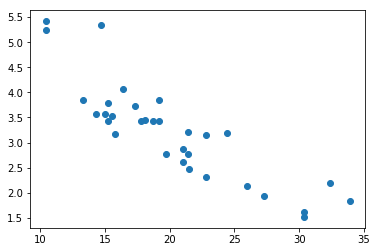

In [45]:
#先来做个简单的散点图
plt.scatter(df["mpg"],df["wt"])

接下来，看看完整的散点图如何绘制

**面向对象作图（O—O）**

(1, 7)

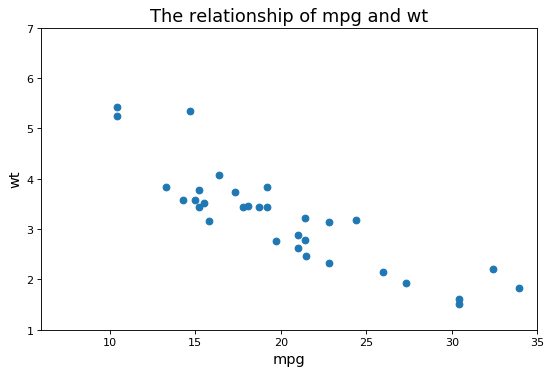

In [49]:
fig,ax = plt.subplots(figsize = (8,5),dpi = 80) 
#生成一个figure对象和一个坐标系axes对象，并且创建一个图形区域长宽比为8:5，分辨率为每英寸80像素的图

ax.scatter(df["mpg"],df["wt"]) #作散点图

ax.set_xlabel("mpg",fontsize=13) #添加x轴标签
ax.set_ylabel("wt",fontsize=13)  #添加y轴标签
ax.set_title("The relationship of mpg and wt",fontsize=16) #添加主标题
ax.set_xlim(6,35)  #x轴调整取值范围
ax.set_ylim(1,7)  #y轴调整取值范围

在解读一张图的时候，可以参照下面的顺序：

1. 一句话概括这张图画了什么：“这幅图描绘了汽车的每加仑英里数（mpg）和车重（wt）的关系。”
2. 说明坐标轴：“图中横轴代表了每加仑英里数（mpg），纵轴代表了车重（wt）。”
3. 说明图像元素的含义：“每个点对应了一辆车的每加仑英里数和车重，代表了一个样本。”
4. 深入解读：“我们可以看到，每加仑英里数（mpg）越大，车重（wt）越小，说明每加仑英里数和车重是负相关关系”

>散点图的应用场景：查看两个变量间的相关情况，例如房屋平米数与房屋出售价格的关系

## 参数介绍

ax.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, data=None, **kwargs)

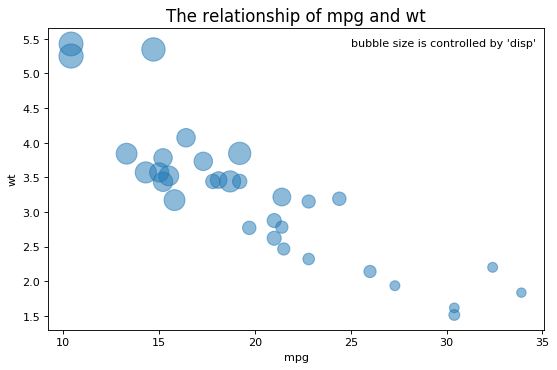

In [53]:
#气泡大小由disp变量控制
fig,ax = plt.subplots(figsize = (8,5),dpi = 80)

ax.scatter(df["mpg"],df["wt"],s = df["disp"],alpha = 0.5)    
#df["disp"]作为一个连续型变量

ax.set_xlabel("mpg")
ax.set_ylabel("wt")
ax.set_title("The relationship of mpg and wt",fontsize=15)
ax.text(25,5.4,"bubble size is controlled by 'disp'")

这个图相比一般散点图多了一个维度的数据，即将第三个维度的数据大小以气泡大小表示

应用场景：在研究2个变量的关系时，需要加入连续型变量作为第三维度

这里涉及到了一个参数s，用于控制散点的大小，如果s输入的是一个固定值，那么就只是单纯的改变散点的大小，不具备维度

Text(0.5,1,'The relationship of mpg and wt')

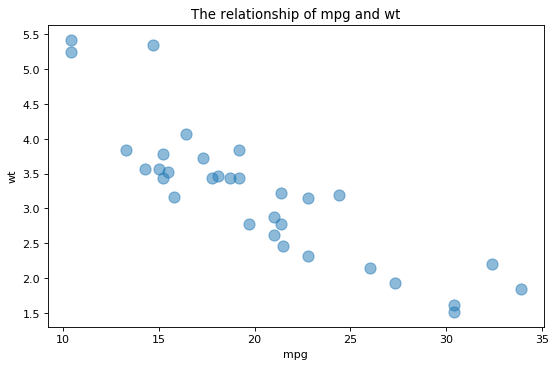

In [7]:
#设置固定气泡大小
fig,ax = plt.subplots(figsize = (8,5),dpi = 80)

ax.scatter(df["mpg"],df["wt"],s = 100,alpha = 0.5)

ax.set_xlabel("mpg")
ax.set_ylabel("wt")
ax.set_title("The relationship of mpg and wt")

### c 代表点的填充颜色

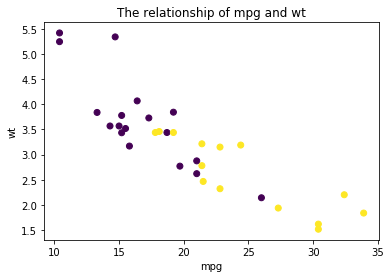

In [7]:
fig,ax = plt.subplots()

ax.scatter(df["mpg"],df["wt"],c=df["vs"])   
#df["vs"]作为一个分类变量

ax.set_xlabel("mpg")
ax.set_ylabel("wt")
ax.set_title("The relationship of mpg and wt")

应用场景：在研究2个变量的关系时，需要加入离散型变量作为第三维度

但是我们发现好像缺了点什么：我们不知道黄色代表什么值，紫色代表什么值，对吧？

因此我们需要添加1个图例来表明每个颜色代表的是什么数据

**思路：已知vs只有0,1两种值，那么我只需要提取出vs==0的数据源和vs==1的数据源，在1张图上用2套数据源画2种颜色的散点图即可**

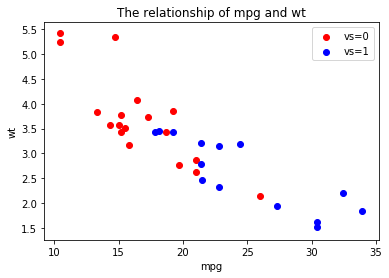

In [60]:
#一种比较容易理解的方法，也是比较死板的做法
x_vs0 = df["mpg"].loc[df["vs"]==0]
y_vs0 = df["wt"].loc[df["vs"]==0]
x_vs1 = df["mpg"].loc[df["vs"]==1]
y_vs1 = df["wt"].loc[df["vs"]==1]

fig,ax = plt.subplots()

ax.scatter(x_vs0,y_vs0,c="red",label="vs=0")
ax.scatter(x_vs1,y_vs1,c="blue",label="vs=1")

ax.set_xlabel("mpg")
ax.set_ylabel("wt")
ax.set_title("The relationship of mpg and wt")
ax.legend()

**但是有个问题：如果vs有很多个值怎么办，难道要一个个提取出来？所以更智能的做法是：**

1. 得到vs的唯一值
2. 给每一个值配对一种颜色，创建一个与vs唯一值配对的颜色列表
3. 将vs唯一值的序列改造成一个带索引的序列，针对这个索引序列写个循环，将vs的每个唯一取值和对应的索引给遍历过去，提取出对应的x和y，根据索引匹配颜色列表，根据序列的值建立标签label，这样就可以智能化地画出带分类图例的散点图了

第一次循环时，i=0，v=0，x为vs==0时取出的mpg值；y为vs==0时取出的wt值

第二次循环时，i=1，v=1，x为vs==1时取出的mpg值，y为vs==1时取出wt值

In [17]:
df['vs'].unique()

array([0, 1], dtype=int64)

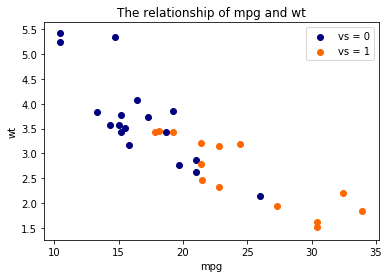

In [9]:
#更智能化的做法
fig,ax = plt.subplots()

unique = list(set(df["vs"]))
colors = [plt.cm.jet(i/max(unique)*0.8) for i in unique]
for i, v in enumerate(unique):                              #将vs唯一值的这个序列改造成一个带索引的序列，并建立一个关于该序列索引和值的循环
    x = [df["mpg"][j] for j in range(len(df["mpg"])) if df["vs"][j] == v] #取出对应的mpg
    y = [df["wt"][j] for j in range(len(df["wt"])) if df["vs"][j] == v]   #取出对应的wt
    ax.scatter(x, y, c=colors[i], label="vs = "+ str(v))   #根据取出的mpg和wt、i匹配的颜色、以及v对应的标签来画散点图

ax.set_xlabel("mpg")
ax.set_ylabel("wt")
ax.set_title("The relationship of mpg and wt")
ax.legend()

In [10]:
unique

[0, 1]

在上面的例子里涉及到了一个参数c，用于点的颜色设置，如果c输入的是一个固定值，那么就只是单纯的改变散点的颜色，不具备维度

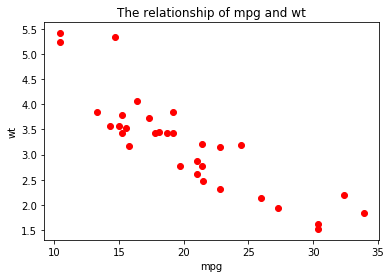

In [32]:
fig,ax = plt.subplots()

ax.scatter(df["mpg"],df["wt"],c = "red")

ax.set_xlabel("mpg")
ax.set_ylabel("wt")
ax.set_title("The relationship of mpg and wt")

如果你希望设置一些自己想要的颜色，可以用RGB的方式来调色

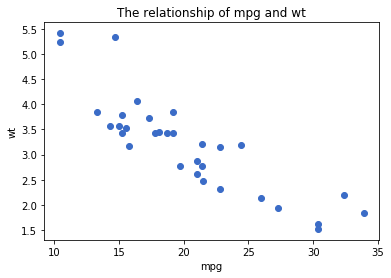

In [64]:
fig,ax = plt.subplots()

ax.scatter(df["mpg"],df["wt"],c = (59/255,108/255,199/255))

ax.set_xlabel("mpg")
ax.set_ylabel("wt")
ax.set_title("The relationship of mpg and wt")

### marker表示 点的形状

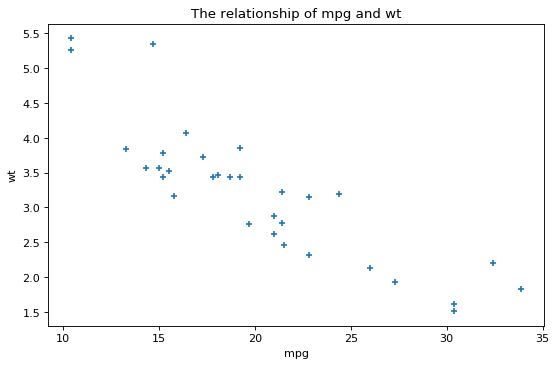

In [69]:
#设置点的形状
fig,ax = plt.subplots(figsize = (8,5),dpi = 80)

ax.scatter(df["mpg"],df["wt"],marker="+")

ax.set_xlabel("mpg")
ax.set_ylabel("wt")
ax.set_title("The relationship of mpg and wt")

### edgecolors表示点的边界颜色

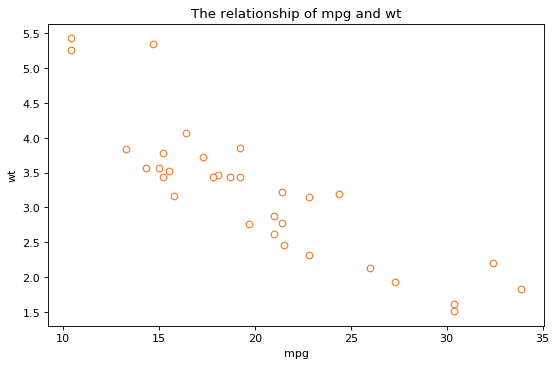

In [16]:
fig,ax = plt.subplots(figsize = (8,5),dpi = 80)

ax.scatter(df["mpg"],df["wt"],c="white",edgecolors=(244/255,119/255,38/255))

ax.set_xlabel("mpg")
ax.set_ylabel("wt")
ax.set_title("The relationship of mpg and wt")

## 画多个散点图

### 在一张图里画多个散点图

Text(0.5,1,'The relationship of mpg and qsec')

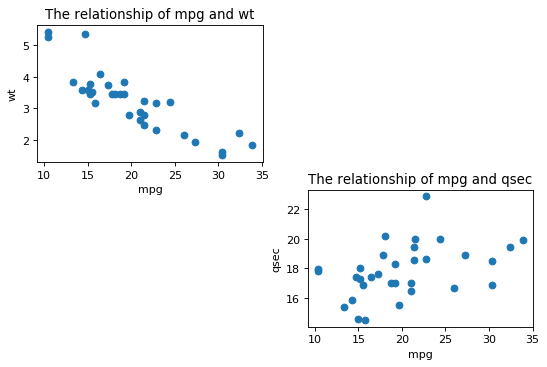

In [19]:
fig = plt.figure(figsize=(8,5),dpi=80)
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(224)

ax1.scatter(df["mpg"],df["wt"])
ax1.set_xlabel("mpg")
ax1.set_ylabel("wt")
ax1.set_title("The relationship of mpg and wt")

ax2.scatter(df["mpg"],df["qsec"])
ax2.set_xlabel("mpg")
ax2.set_ylabel("qsec")
ax2.set_title("The relationship of mpg and qsec")

### 在多张图里画散点图

Text(0.5,1,'The relationship of mpg and qsec')

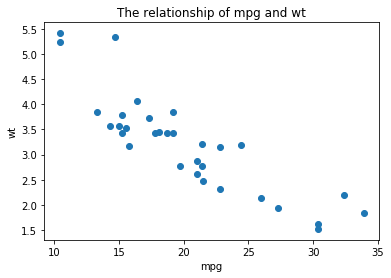

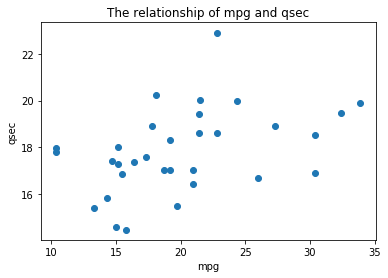

In [20]:
#生成第一张图
fig1 = plt.figure()

ax1 = fig1.add_subplot(111)

ax1.scatter(df["mpg"],df["wt"])

ax1.set_xlabel("mpg")
ax1.set_ylabel("wt")
ax1.set_title("The relationship of mpg and wt")

#生成第二张图
fig2 = plt.figure()

ax2 = fig2.add_subplot(111)

ax2.scatter(df["mpg"],df["qsec"])

ax2.set_xlabel("mpg")
ax2.set_ylabel("qsec")
ax2.set_title("The relationship of mpg and qsec")